In [31]:
from jenga.tasks.income import IncomeEstimationTask
from jenga.corruptions.generic import MissingValues
from jenga.evaluation.corruption_impact import CorruptionImpactEvaluator
import matplotlib.pyplot as plt

import numpy as np

In [49]:
task = IncomeEstimationTask(seed=42)

evaluator = CorruptionImpactEvaluator(task)

corruptions = []

for impacted_column in ['education', 'workclass', 'marital_status', 'occupation']:
    for fraction in [0.99, 0.5, 0.25, 0.1, 0.01]:
        for missingness in ['MCAR', 'MAR', 'MNAR']:
            corruption = MissingValues(impacted_column, fraction, missingness=missingness, na_value='___')
            corruptions.append(corruption)

In [50]:
model = task.fit_baseline_model(task.train_data, task.train_labels)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.8s finished


In [51]:
results = evaluator.evaluate(model, 300, *corruptions)

In [52]:
def find_result(column, fraction, missingness, results):
    for result in results:
        corr = result.corruption
        if corr.column == column and corr.fraction == fraction and corr.missingness == missingness:
            return result

In [78]:
def plot_impact(column, ax, results):
    scores = []
    labels = []

    for impacted_column in [column]:
        for fraction in [0.01, 0.1, 0.5, 0.99]:
            for missingness in ['MCAR', 'MAR', 'MNAR']:        
                result = find_result(impacted_column, fraction, missingness, results)
                scores.append(result.corrupted_scores)
                labels.append(f"{missingness} {fraction}")

    baseline_score = result.baseline_score            

    ax.axhline(baseline_score, alpha=.5, linestyle='--')
    ax.boxplot(scores, showfliers=False)


    ax.set_xticks(range(1, len(labels) + 1), labels)
    #ax.set_xticks(rotation=90)
    ax.set_ylim((0.81, 0.895))
    ax.set_title(f"Missingness in {column}")

/home/ssc/Entwicklung/projects/jenga/env/lib/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


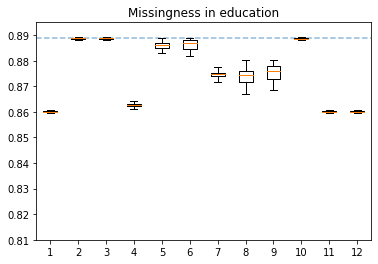

In [79]:
plot_impact('education', plt.gca(), results)

plt.show()

/home/ssc/Entwicklung/projects/jenga/env/lib/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


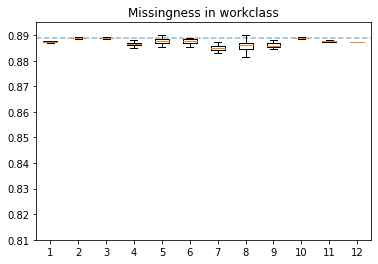

In [80]:
plot_impact('workclass', plt.gca(), results)

plt.show()

/home/ssc/Entwicklung/projects/jenga/env/lib/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


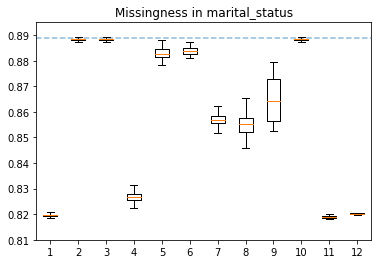

In [81]:
plot_impact('marital_status', plt.gca(), results)

plt.show()

/home/ssc/Entwicklung/projects/jenga/env/lib/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


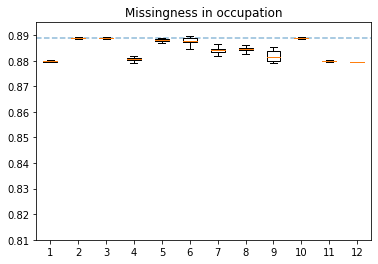

In [82]:
plot_impact('occupation', plt.gca(), results)

plt.show()